<a href="https://colab.research.google.com/github/Hyun-ho-Lee/2021graduate-school/blob/main/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [206]:
from google.colab import drive
drive.mount('/content/drvie')

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [207]:
train=pd.read_csv("/content/drvie/MyDrive/housetrain.csv")
test=pd.read_csv("/content/drvie/MyDrive/housetest.csv")

In [208]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [209]:
train.head(3)
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


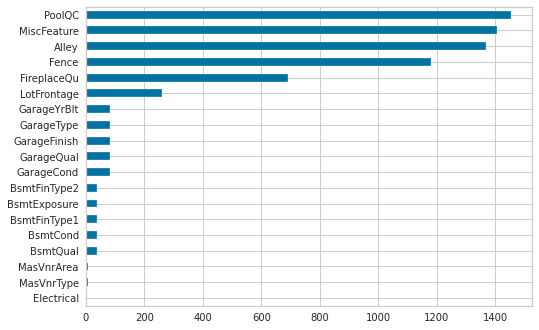

In [210]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.barh()

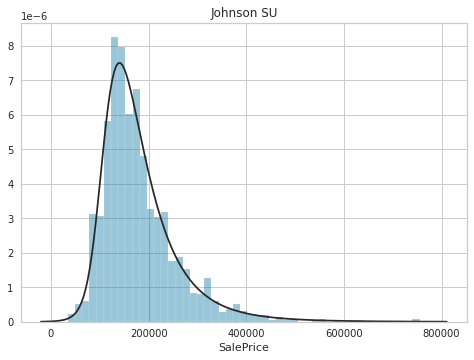

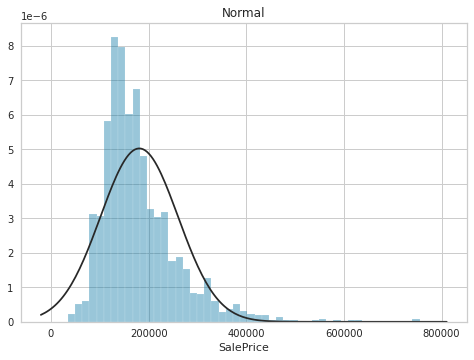

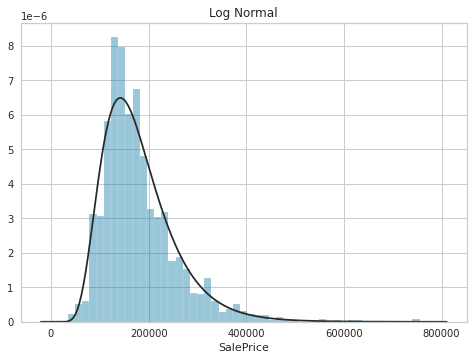

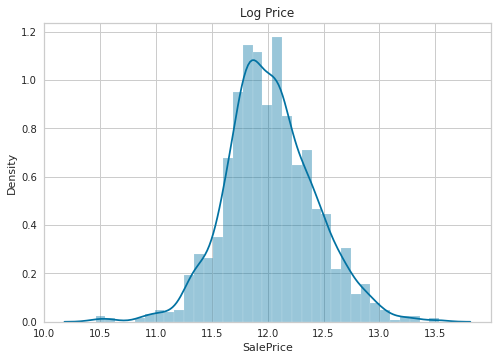

In [173]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
target = np.log(train.SalePrice)
plt.figure(4); plt.title("Log Price")
sns.distplot(target, kde=True)


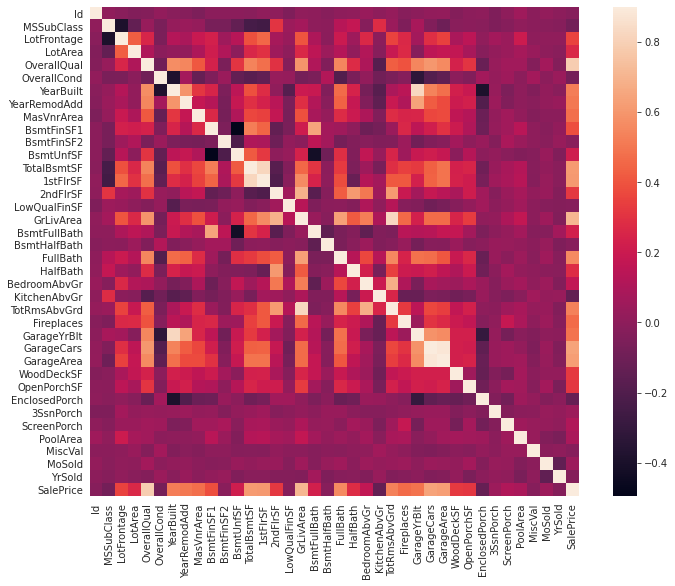

In [7]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
numeric_feature=train.select_dtypes(include=[np.number])
numeric_feature.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
numeric_feature.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [248]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2919, 80)


In [247]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio


Text(0.5, 1.0, 'Percent missing data by feature')

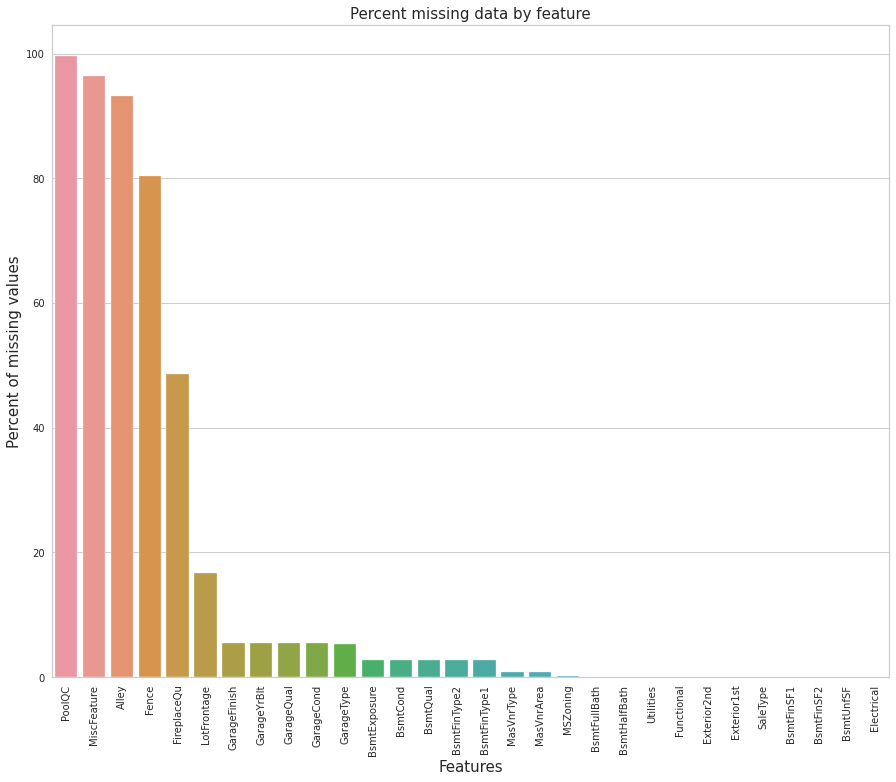

In [176]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [215]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["PoolQC"].value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [216]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["MiscFeature"].value_counts()


None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [217]:
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [218]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [219]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [220]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [221]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [222]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [223]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [224]:
all_data = all_data.drop(['Utilities'], axis=1)

In [225]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [226]:
for i in ('Electrical', 'KitchenQual', 'Exterior1st','Exterior2nd','SaleType'):
  all_data[i]=all_data[i].fillna(all_data[i].mode()[0])

In [227]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [228]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [246]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


In [192]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [245]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [234]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))
all_data

Shape all_data: (2919, 79)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal


In [236]:
all_data['BsmtQual']
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal


In [244]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [241]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
all_data


Skew in numerical features: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal,2566.0
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal,2524.0
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal,2706.0
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml,2473.0
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal,1638.0
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml,1638.0
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml,2448.0
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal,1882.0


In [243]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

all_data

There are 60 skewed numerical features to Box Cox transform


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,0.571575,1.505394,RL,2.227075,3.798610,0.571575,0.571575,1.000916,Lvl,Inside,0.000000,CollgCr,Norm,Norm,1Fam,2Story,1.357457,1.121833,3.359428,3.359428,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.611703,0.834066,1.121833,PConc,0.834066,1.121833,1.000916,0.834066,3.031822,1.292816,0.0,2.520750,3.093145,GasA,0.000000,0.571575,SBrkr,3.093145,3.092403,0.0,3.310366,0.571575,0.000000,0.834066,0.571575,1.000916,0.571575,0.834066,1.413141,1.292816,0.000000,1.000916,Attchd,3.359428,0.834066,0.834066,2.950540,1.216017,1.216017,0.834066,0.000000,2.204126,0.000000,0.0,0.0,0.0,1.000916,1.121833,None,0.000000,1.121833,0.834066,WD,Normal,3.435891
1,0.834066,1.216017,RL,2.301430,3.837043,0.571575,0.571575,1.000916,Lvl,FR2,0.000000,Veenker,Feedr,Norm,1Fam,1Story,1.292816,1.357457,3.355226,3.355226,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.000916,1.121833,CBlock,0.834066,1.121833,0.571575,0.000000,3.135325,1.292816,0.0,2.735757,3.215545,GasA,0.000000,0.571575,SBrkr,3.215545,0.000000,0.0,3.215545,0.000000,0.571575,0.834066,0.000000,1.000916,0.571575,1.000916,1.292816,1.292816,0.571575,1.216017,Attchd,3.355226,0.834066,0.834066,2.893916,1.216017,1.216017,0.834066,2.751691,0.000000,0.000000,0.0,0.0,0.0,1.000916,1.121833,None,0.000000,1.357457,0.571575,WD,Normal,3.430811
2,1.000916,1.505394,RL,2.243319,3.884731,0.571575,0.571575,0.000000,Lvl,Inside,0.000000,CollgCr,Norm,Norm,1Fam,2Story,1.357457,1.121833,3.359119,3.359273,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.547055,0.834066,1.121833,PConc,0.834066,1.121833,0.834066,0.834066,2.911744,1.292816,0.0,2.875008,3.115994,GasA,0.000000,0.571575,SBrkr,3.115994,3.096829,0.0,3.323876,0.571575,0.000000,0.834066,0.571575,1.000916,0.571575,0.834066,1.292816,1.292816,0.571575,1.216017,Attchd,3.359119,0.834066,0.834066,2.983967,1.216017,1.216017,0.834066,0.000000,2.067236,0.000000,0.0,0.0,0.0,1.000916,1.121833,None,0.000000,1.544449,0.834066,WD,Normal,3.452234
3,1.121833,1.544449,RL,2.198137,3.835471,0.571575,0.571575,0.000000,Lvl,Corner,0.000000,Crawfor,Norm,Norm,1Fam,2Story,1.357457,1.121833,3.345510,3.354284,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.000916,1.121833,BrkTil,1.121833,0.571575,1.000916,0.000000,2.644426,1.292816,0.0,2.945797,3.053649,GasA,0.834066,0.571575,SBrkr,3.129784,3.053649,0.0,3.311636,0.571575,0.000000,0.571575,0.000000,1.000916,0.571575,0.834066,1.357457,1.292816,0.571575,0.834066,Detchd,3.358654,1.000916,1.000916,3.001422,1.216017,1.216017,0.834066,0.000000,1.999035,2.721431,0.0,0.0,0.0,1.000916,1.121833,None,0.000000,1.121833,0.000000,WD,Abnorml,3.424524
4,1.216017,1.505394,RL,2.318756,3.955862,0.571575,0.571575,0.000000,Lvl,FR2,0.000000,NoRidge,Norm,Norm,1Fam,2Story,1.413141,1.121833,3.358964,3.358964,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.804697,0.834066,1.121833,PConc,0.834066,1.121833,0.000000,0.834066,3.007844,1.292816,0.0,2.914398,3.185004,GasA,0.000000,0.571575,SBrkr,3.185004,3.158639,0.0,3.388158,0.571575,0.000000,0.834066,0.571575,1.121833,0.571575,0.834066,1.461971,1.292816,0.571575,1.216017,Attchd,3.358964,0.834066,1.000916,3.085642,1.216017,1.216017,0.834066,2.604738,2.318756,0.000000,0.0,0.0,0.0,1.000916,1.121833,None,0.000000,1.000916,0.

In [200]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 222)


In [201]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [82]:
pip install pycaret

     |████████████████████████████████| 266kB 16.1MB/s 
     |████████████████████████████████| 215kB 14.3MB/s 
     |████████████████████████████████| 1.7MB 27.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 2.0MB 43.0MB/s 
     |████████████████████████████████| 245kB 49.7MB/s 
     |████████████████████████████████| 276kB 44.9MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 6.8MB 41.8MB/s 
     |████████████████████████████████| 14.2MB 288kB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 3.2MB 44.5MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 

In [142]:
train['Income']=y

In [87]:
from pycaret.classification import * 

clf = setup(train, target='Income', session_id=42)

,Description,Value
0,session_id,42
1,Target,Income
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1460, 223)"
5,Missing Values,False
6,Numeric Features,220
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [143]:
from pycaret.regression import *
exp_reg = setup(train, target = 'Income')

,Description,Value
0,session_id,1042
1,Target,Income
2,Original Data,"(1460, 223)"
3,Missing Values,False
4,Numeric Features,220
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 220)"


In [144]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.632864e+04,8.055811e+08,2.776154e+04,8.642000e-01,0.1305,9.380000e-02,0.219
et,Extra Trees Regressor,1.677296e+04,8.023136e+08,2.768641e+04,8.635000e-01,0.1385,9.940000e-02,1.690
gbr,Gradient Boosting Regressor,1.565968e+04,8.475531e+08,2.785316e+04,8.543000e-01,0.1314,9.250000e-02,0.574
rf,Random Forest Regressor,1.720623e+04,9.038356e+08,2.925398e+04,8.454000e-01,0.1432,1.025000e-01,1.868
huber,Huber Regressor,1.810484e+04,1.034632e+09,3.145806e+04,8.296000e-01,0.1543,1.050000e-01,0.160
br,Bayesian Ridge,1.932578e+04,1.124464e+09,3.258945e+04,8.128000e-01,0.2266,1.170000e-01,0.074
ridge,Ridge Regression,2.008328e+04,1.142871e+09,3.306582e+04,8.082000e-01,0.2093,1.226000e-01,0.019
ada,AdaBoost Regressor,2.282444e+04,1.216907e+09,3.428417e+04,7.928000e-01,0.1860,1.452000e-01,0.319
omp,Orthogonal Matching Pursuit,2.098811e+04,1.236053e+09,3.429534e+04,7.908000e-01,0.2110,1.257000e-01,0.020
llar,Lasso Least Angle Regression,2.057223e+04,1.239424e+09,3.423040e+04,7.906000e-01,0.2398,1.252000e-01,0.073


In [145]:
gbr=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13260.6948,4.292537e+08,20718.4388,0.9399,0.0983,0.0719
1,13473.0856,7.228324e+08,26885.5429,0.8997,0.0891,0.0662
2,17084.9797,5.985221e+08,24464.7119,0.9039,0.1363,0.1011
3,15838.6073,7.072183e+08,26593.5757,0.9032,0.1501,0.1025
4,14423.9356,7.203146e+08,26838.6774,0.8711,0.1052,0.0772
5,18032.7398,8.825086e+08,29707.0461,0.8542,0.1474,0.1033
6,15985.6538,5.326280e+08,23078.7357,0.8965,0.1357,0.1016
7,17602.6025,2.727008e+09,52220.7667,0.5048,0.1685,0.1029
8,15650.8123,6.266659e+08,25033.2960,0.8798,0.1505,0.1040
9,15243.6485,5.285787e+08,22990.8391,0.8896,0.1331,0.0944


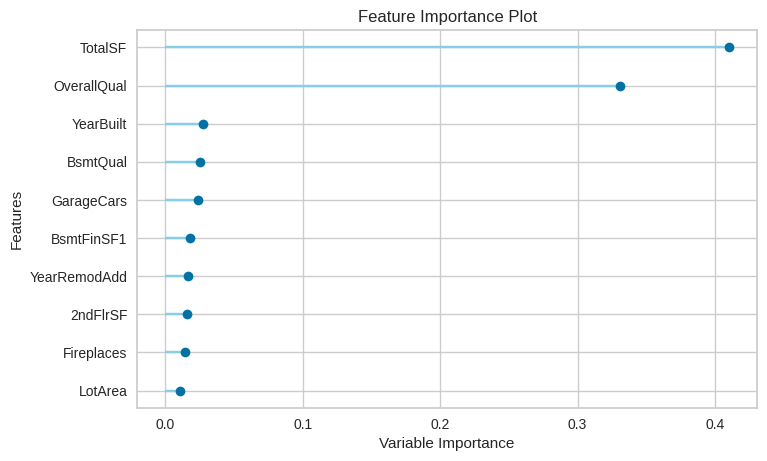

In [146]:
plot_model(estimator = gbr, plot = 'feature')

In [96]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17812.5257,1.046564e+09,32350.6340,0.8404,0.1433,0.1040
1,20939.7341,9.291831e+08,30482.5056,0.8400,0.1628,0.1196
2,15849.0919,4.359317e+08,20878.9786,0.9323,0.1166,0.0891
3,14160.8971,4.062046e+08,20154.5189,0.8912,0.1201,0.0907
4,19515.1923,1.072185e+09,32744.2367,0.7502,0.1539,0.1135
5,17510.3843,5.243646e+08,22899.0077,0.8738,0.1589,0.1228
6,19111.9675,1.006612e+09,31727.1460,0.8231,0.1447,0.1025
7,18487.1828,7.330825e+08,27075.4967,0.8514,0.1568,0.1121
8,16042.3054,7.227885e+08,26884.7270,0.8761,0.1421,0.0922
9,15634.3953,6.913368e+08,26293.2838,0.8906,0.1289,0.0896


In [147]:
gbr_final = finalize_model(gbr)

In [148]:
predict_cat = predict_model(gbr_final, test)

In [153]:
predict_cat.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Label
1460,13.224069,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.0,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,120399.192137
1461,13.226109,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.0,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,11.901094,2.259674,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,160491.945895
1462,13.228148,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.0,2.055642,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,1.194318,1.820334,1.540963,1.194318,11.476685,2.259674,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.0,0.0,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,189122.867959


In [161]:
predict_cat

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Label
1460,13.224069,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.000000,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.000000,0.000000,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,120399.192137
1461,13.226109,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,11.901094,2.259674,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,160491.945895
1462,13.228148,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.000000,2.055642,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,1.194318,1.820334,1.540963,1.194318,11.476685,2.259674,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,189122.867959
1463,13.230186,2.885846,6.172972,19.865444,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.179714,14.179714,3.858807,1.540963,1.820334,1.820334,1.820334,1.540963,1.194318,10.749651,2.259674,0.000000,9.207511,11.910125,0.000000,0.730463,11.910125,11.062536,0.0,13.504453,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,183626.956316
1464,13.232223,0.000000,5.093857,17.257255,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.170316,14.170316,0.000000,1.194318,1.820334,1.194318,1.820334,1.540963,0.000000,8.720170,2.259674,0.000000,12.172900,12.833625,0.000000,0.730463,12.833625,0.000000,0.0,12.833625,0.000000,0.000000,1.194318,0.000000,1.194318,0.730463,1.194318,2.055642,2.259674,0.000000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,187731.671751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,15.394418,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.259674,0.000000,2.259674,0.000000,10.496872,10.496872,1.194318,0.730463,10.496872,10.496872,0.0,12.37

In [164]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,13.224069,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.000000,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.000000,0.000000,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,13.226109,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,11.901094,2.259674,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,13.228148,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.000000,2.055642,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,1.194318,1.820334,1.540963,1.194318,11.476685,2.259674,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,13.230186,2.885846,6.172972,19.865444,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.179714,14.179714,3.858807,1.540963,1.820334,1.820334,1.820334,1.540963,1.194318,10.749651,2.259674,0.000000,9.207511,11.910125,0.000000,0.730463,11.910125,11.062536,0.0,13.504453,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,13.232223,0.000000,5.093857,17.257255,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.170316,14.170316,0.000000,1.194318,1.820334,1.194318,1.820334,1.540963,0.000000,8.720170,2.259674,0.000000,12.172900,12.833625,0.000000,0.730463,12.833625,0.000000,0.0,12.833625,0.000000,0.000000,1.194318,0.000000,1.194318,0.730463,1.194318,2.055642,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,15.394418,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.259674,0.000000,2.259674,0.000000,10.496872,10.496872,1.194318,0.730463,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963

In [107]:
predict_cat.index

RangeIndex(start=1460, stop=2919, step=1)

In [154]:
sub = pd.DataFrame()
sub['Id'] = predict_cat.index
sub['SalePrice'] = predict_cat["Label"]
sub.to_csv('submission1.csv',index=False)

In [156]:
sub = pd.DataFrame()
sub['Id'] = predict_cat['Id']
sub['SalePrice'] =predict_cat['Label']
sub.to_csv('submission.csv',index=False)

In [159]:
sub['Id']=predict_cat.index
sub

,Id,SalePrice
1460,1460,120399.192137
1461,1461,160491.945895
1462,1462,189122.867959
1463,1463,183626.956316
1464,1464,187731.671751
...,...,...
2914,2914,84760.337348
2915,2915,88585.503078
2916,2916,148072.964728
2917,2917,121301.224800


In [160]:
sub.to_csv('submission.csv',index=False)

In [167]:
print("all_data size is : {}".format(all_data.shape))
print("all_data size is : {}".format(sub.shape))

all_data size is : (2919, 222)
all_data size is : (1459, 2)


In [168]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,13.224069,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.000000,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.000000,0.000000,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,13.226109,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,11.901094,2.259674,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,13.228148,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.000000,2.055642,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,1.194318,1.820334,1.540963,1.194318,11.476685,2.259674,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,13.230186,2.885846,6.172972,19.865444,0.730463,0.730463,0.000000,0.000000,2.259674,2.055642,14.179714,14.179714,3.858807,1.540963,1.820334,1.820334,1.820334,1.540963,1.194318,10.749651,2.259674,0.000000,9.207511,11.910125,0.000000,0.730463,11.910125,11.062536,0.0,13.504453,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,13.232223,0.000000,5.093857,17.257255,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.170316,14.170316,0.000000,1.194318,1.820334,1.194318,1.820334,1.540963,0.000000,8.720170,2.259674,0.000000,12.172900,12.833625,0.000000,0.730463,12.833625,0.000000,0.0,12.833625,0.000000,0.000000,1.194318,0.000000,1.194318,0.730463,1.194318,2.055642,2.259674,0.000000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,15.394418,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.259674,0.000000,2.259674,0.000000,10.496872,10.496872,1.194318,0.730463,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963